# A First Brush With Jupyter

This notebook will show you some things I find useful to do in these notebooks.

In [1]:
# you only need to do this once. Shamelessly stolen from Johannsen.
!pip install --upgrade version_information

  Running setup.py bdist_wheel for version-information ... - \ done
  Stored in directory: /Users/joshuapaultan/Library/Caches/pip/wheels/4b/4c/f7/4d99d7820a507d8ae55204fcc00d66cdabf596d4b01228e7bd
Successfully built version-information


In [2]:
#Preamble. These are some standard things I like to include in IPython Notebooks.
import astropy
from astropy.table import Table, Column, MaskedColumn
import numpy as np
import matplotlib.pyplot as plt
%load_ext version_information

%version_information numpy, scipy, matplotlib, sympy, version_information

Software versions
Python 2.7.11 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.2.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.0
scipy 0.17.1
matplotlib 1.5.1
sympy 1.0
version_information 1.0.3
Wed Sep 14 16:01:02 2016 CLST

You will more than likely want to plot some things. In the notebook environment, this can be done in different ways. I typically choose an inline plot. However, you can also have images from matplotlib run as separate windows or as interactive objects within the notebook.

In [3]:
# special IPython command to prepare the notebook for matplotlib
#interactive plotting in separate window
#%matplotlib qt 
#interactive charts inside notebooks, matplotlib 1.4+
#%matplotlib notebook  
#normal charts inside notebooks
%matplotlib inline

So what to do first? Lets download some Gaia file.

In [4]:
#This cell will download some gaia data file to your pwd
import urllib2
import gzip
some_zipped_gaia_file = urllib2.urlopen('http://cdn.gea.esac.esa.int/Gaia/gaia_source/csv/GaiaSource_000-010-207.csv.gz')
some_gaia_file_saved = open('GaiaSource_000-010-207.csv.gz','wb')
some_gaia_file_saved.write(some_zipped_gaia_file.read())
some_zipped_gaia_file.close()
some_gaia_file_saved.close()
some_gaia_zipfile = gzip.GzipFile('GaiaSource_000-010-207.csv.gz', 'r') 

In [5]:
from astropy.io import ascii
data = ascii.read(some_gaia_zipfile)

In [6]:
data

solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_good_obs_ac,astrometric_n_bad_obs_al,astrometric_n_bad_obs_ac,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_primary_flag,astrometric_relegation_factor,astrometric_weight_al,astrometric_weight_ac,astrometric_priors_used,matched_observations,duplicated_source,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,str5,float64,float64,float64,int64,int64,str5,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64
1635378410781933568,4507654042146237440,371857909,2015.0,284.018456429,0.323431962684,15.3644094695,0.352478685499,--,--,--,--,--,--,0.6411,--,--,--,--,--,--,--,--,--,88,0,87,0,1,0,--,0.655170280084,2.31521922399,false,1.2003734,0.6197851,--,2,10,false,0.3238748,0.349842,0.33311188,0.5430713,-104.0412,-60.889313,-24.123913,42.22047,87,1267.20663277,11.3927746617,17.7676514703,NOT_AVAILABLE,47.1741773591,5.93834065265,287.234747906,37.968684138
1635378410781933568,4507654042146237568,947727977,2015.0,284.021300901,0.374137191414,15.3550956006,0.383357641937,--,--,--,--,--,--,0.70395,--,--,--,--,--,--,--,--,--,107,0,107,0,0,0,--,0.943513687137,4.31267493943,false,2.1932993,0.40037948,--,2,12,false,0.24294688,0.41565245,0.292616,0.535654,-106.101234,-51.403423,-22.373487,-44.30477,106,979.517264439,2.4029934729,18.0472398262,NOT_AVAILABLE,47.1670325631,5.93172482449,287.236756893,37.9591048471
1635378410781933568,4507654046450913664,487763385,2015.0,284.019832518,0.8146581837,15.3473285836,0.755669146696,--,--,--,--,--,--,0.8254,--,--,--,--,--,--,--,--,--,96,0,96,0,0,0,--,0.0,0.0,false,1.0,0.14105824,--,2,12,false,0.25586718,0.37777567,0.2556657,0.53755957,-130.51743,-55.6821,-18.022856,44.13647,93,282.51543544,2.22623889658,19.3971646118,NOT_AVAILABLE,47.1594106662,5.92952063043,287.233770599,37.9515691227
1635378410781933568,4507654046450914176,967412378,2015.0,284.021744774,2.19823670981,15.3488828286,1.91262081119,--,--,--,--,--,--,0.80555,--,--,--,--,--,--,--,--,--,88,0,88,0,0,0,--,3.80835862191,3.31092998552,false,14.69474,0.022539811,--,2,11,false,0.26579067,0.3242545,0.32188582,0.5515567,-144.66031,-54.042034,-14.503501,-43.809856,87,148.927629411,1.73226115174,20.0923318724,NOT_AVAILABLE,47.1616370725,5.92856552565,287.236332585,37.9528863409
1635378410781933568,4507654046450914304,856570868,2015.0,284.018832685,0.835574445433,15.3467376267,0.741885055357,--,--,--,--,--,--,0.8027,--,--,--,--,--,--,--,--,--,88,0,88,0,0,0,--,0.593026883906,0.321201843973,false,2.4923322,0.15122868,--,2,11,false,0.26276904,0.32268173,0.34107515,0.54305035,-149.5235,-54.402363,-13.907869,-43.834236,87,338.134240959,2.09806831701,19.2020471849,NOT_AVAILABLE,47.1584459632,5.93011909003,287.232465429,37.9511004207
1635378410781933568,4507654046450933504,754086420,2015.0,284.022640845,6.30855781258,15.3530941593,4.25506455776,--,--,--,--,--,--,0.9511,--,--,--,--,--,--,--,--,--,44,0,44,0,0,0,--,1.76378788841,1.31085372753,false,6.86313,0.024552291,--,2,5,false,0.4022107,0.49797794,0.40135667,0.6408555,159.65735,-47.171272,4.323387,-37.495277,43,72.6824290454,1.1664698864,20.

In [7]:
data['ra'].mean()

284.1834678025001

In [8]:
data['dec'].mean()

15.657042760840445

In [9]:
from numpy import random
random_subsample = data[random.choice(len(data), 10000)]

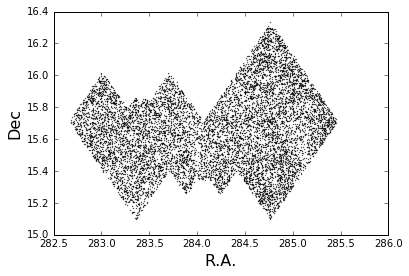

In [10]:
plt.scatter(random_subsample['ra'],random_subsample['dec'], s=0.1, color='black')

plt.xlabel('R.A.', fontsize=16)
plt.ylabel('Dec', fontsize=16)